In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Patient_Profile.csv to Patient_Profile (1).csv


In [5]:
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)
print(f"File '{file_name}' loaded successfully!")

File 'Patient_Profile (1).csv' loaded successfully!


In [6]:
print("Shape of the dataset:", data.shape)
print("\nFirst 5 rows:")
display(data.head())

Shape of the dataset: (37633, 11)

First 5 rows:


,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1.0,90.0,39.0,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1.0,NaN,40.0,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3.0,87.0,46.0,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1.0,75.0,47.0,02-Nov-02,D,Education
4,521075,0,0,0,0,3.0,NaN,80.0,24-Nov-02,H,Others


In [7]:
print("Column Information:")
print(data.info())

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37633 entries, 0 to 37632
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         37633 non-null  int64  
 1   Online_Follower    37633 non-null  int64  
 2   LinkedIn_Shared    37633 non-null  int64  
 3   Twitter_Shared     37633 non-null  int64  
 4   Facebook_Shared    37633 non-null  int64  
 5   Income             4362 non-null   float64
 6   Education_Score    1384 non-null   float64
 7   Age                5015 non-null   float64
 8   First_Interaction  37633 non-null  object 
 9   City_Type          14249 non-null  object 
 10  Employer_Category  2840 non-null   object 
dtypes: float64(3), int64(5), object(3)
memory usage: 3.2+ MB
None


In [8]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
Patient_ID               0
Online_Follower          0
LinkedIn_Shared          0
Twitter_Shared           0
Facebook_Shared          0
Income               33271
Education_Score      36249
Age                  32618
First_Interaction        0
City_Type            23384
Employer_Category    34793
dtype: int64


In [9]:
print("\nStatistical Summary for Numerical Columns:")
display(data.describe())


Statistical Summary for Numerical Columns:


,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age
count,37633.000000,37633.000000,37633.000000,37633.000000,37633.000000,4362.000000,1384.000000,5015.000000
mean,507148.408338,0.022533,0.027077,0.021603,0.023543,1.077717,78.231288,49.129811
std,12411.747993,0.148412,0.162311,0.145387,0.151623,1.332109,8.751698,12.555632
min,485678.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,30.000000
25%,496393.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,40.000000
50%,507104.000000,0.000000,0.000000,0.000000,0.000000,1.000000,79.000000,44.000000
75%,517882.000000,0.000000,0.000000,0.000000,0.000000,2.000000,85.000000,52.000000
max,528657.000000,1.000000,1.000000,1.000000,1.000000,6.000000,101.000000,80.000000


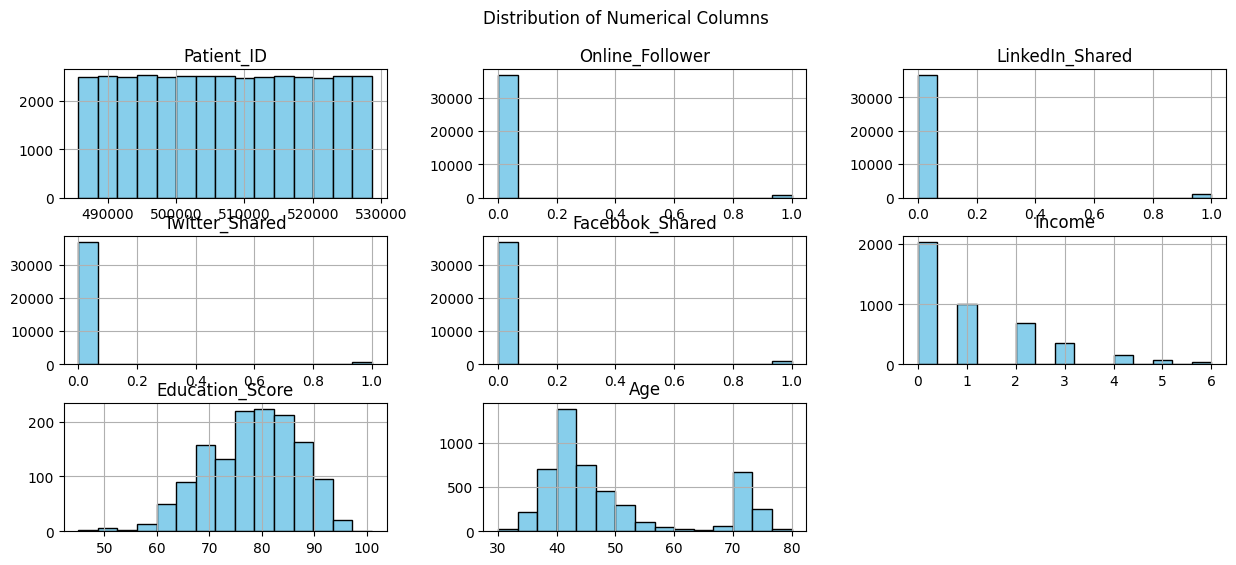

In [10]:
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
if len(num_cols) > 0:
    data[num_cols].hist(bins=15, figsize=(15, 6), color='skyblue', edgecolor='black')
    plt.suptitle('Distribution of Numerical Columns')
    plt.show()
else:
    print("No numerical columns found.")

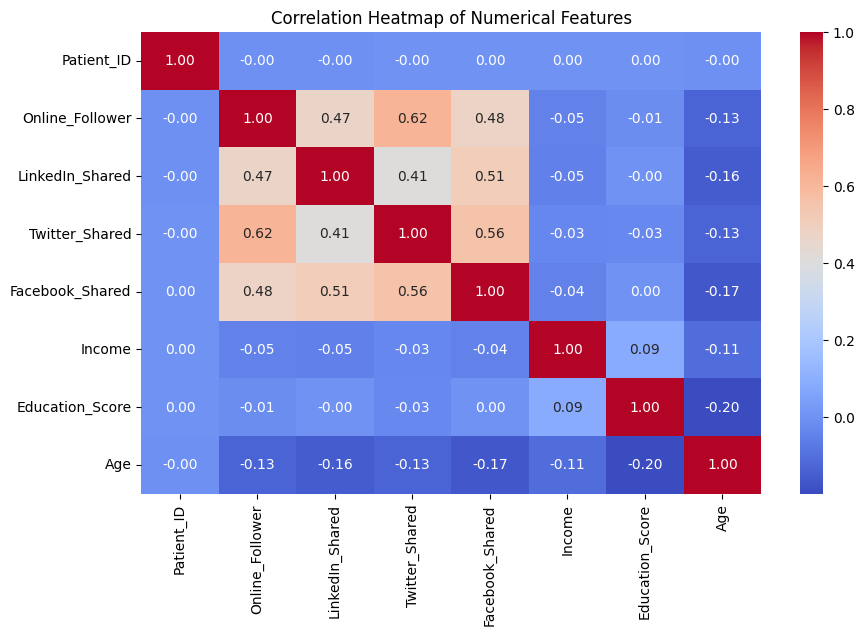

In [11]:
if len(num_cols) > 1:
    plt.figure(figsize=(10, 6))
    sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title("Correlation Heatmap of Numerical Features")
    plt.show()
else:
    print("Not enough numerical columns for correlation heatmap.")

<ipython-input-12-170b8cd2e290>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], order=data[col].value_counts().index, palette='Set2')


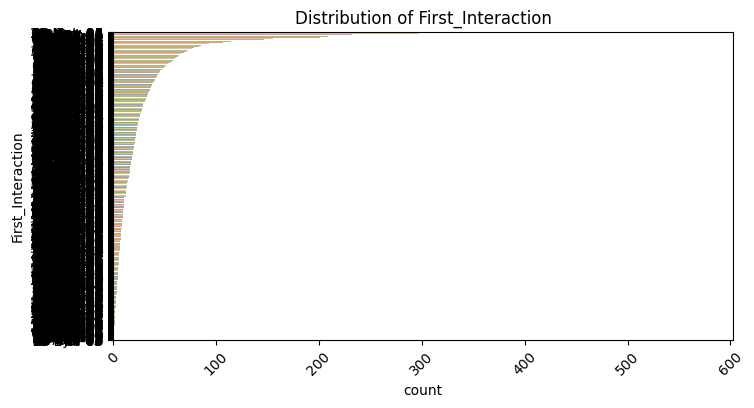

<ipython-input-12-170b8cd2e290>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], order=data[col].value_counts().index, palette='Set2')


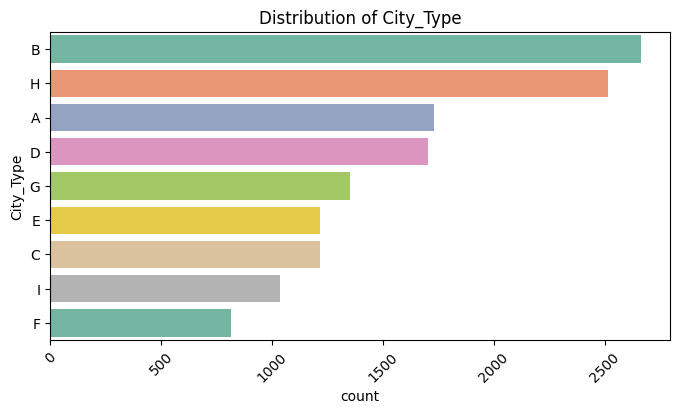

<ipython-input-12-170b8cd2e290>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col], order=data[col].value_counts().index, palette='Set2')


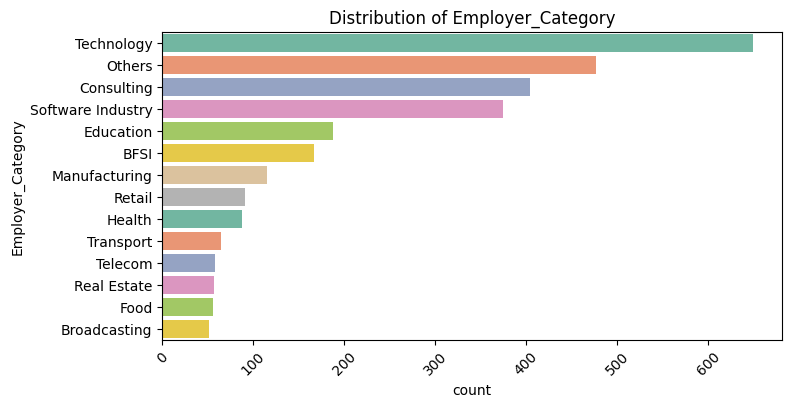

In [12]:
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data[col], order=data[col].value_counts().index, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()